In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

path = '/home/milla/datasets/cian.csv'
cian = pd.read_csv(path)
cian.shape[0]


23368

In [417]:
cian.drop('Unnamed: 0',axis=1, inplace=True)

In [418]:
# cian.columns

In [419]:
cian = cian.rename(columns = {'ID  объявления': 'ID', 'Количество комнат':'rooms', 'Тип': 'type', 'Метро': 'subway', 'Адрес': 'address', 'Площадь, м2': 'area_m2', 'Дом': 'building', 
'Парковка':'parking', 'Цена':'price', 'Телефоны':'phone', 'Описание':'description', 'Ремонт':'renovation','Площадь комнат, м2':'rooms_area_m2','Балкон': 'balcony', 'Окна':'windows',
'Санузел':'bathroom', 'Можно с детьми/животными': 'kids_pets_allowed', 'Дополнительно': 'additional', 'Название ЖК': 'resid_site_name', 'Серия дома': 'building_type',
'Высота потолков, м':'ceiling_m', 'Лифт':'lift', 'Мусоропровод':'garbage_trunk', 'Ссылка на объявление':'adv_link'})

In [420]:
# cian.columns

In [421]:
cian['garbage_trunk'].to_list()

['Да',
 'Нет',
 nan,
 nan,
 'Да',
 nan,
 nan,
 'Нет',
 'Нет',
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 'Нет',
 nan,
 nan,
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Да',
 'Да',
 'Да',
 nan,
 'Нет',
 'Да',
 nan,
 'Да',
 'Да',
 'Да',
 'Да',
 'Да',
 'Да',
 'Да',
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Нет',
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Да',
 'Да',
 nan,
 nan,
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 nan,
 'Да',
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 nan,
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 nan,
 'Да',
 'Да',
 'Да',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Нет',
 'Да',
 nan,
 'Да',
 nan,
 nan,
 nan,
 nan,
 'Да',
 'Нет',
 'Да',
 'Да',
 nan,
 'Нет',
 'Не

In [422]:
cian['garbage_trunk'] = cian['garbage_trunk'].fillna('Нет')

In [423]:
cian = cian.replace({'garbage_trunk': {'Да': 1, 'Нет': 0}})

In [424]:
cian['garbage_trunk'].isna().sum()

0

In [425]:
# cian[['type']].value_counts()
# cian[['subway']].value_counts()

In [426]:
cian.drop(['ID','building_type', 'type','phone','description','adv_link'], axis=1, inplace=True)

In [427]:
# начнем вытаскивать этажи и наш конкретный этаж
# cian[['building']]

In [428]:
#вытаскиваем тип дома
def sep_building(name: str):
    if ',' in name:
        return name.split(',')[1].strip()
    return np.nan

In [429]:
# вытаскиваем этаж
def sep_floor(name: str):
    if ',' in name:
        return int(name.split(',')[0].split("/")[0].strip())
    return int(name.split("/")[0].strip())

In [430]:
# вытаскиваем кол-во всех этажей в доме
def total_floors(name: str):
    if ',' in name:
        return int(name.split(',')[0].split("/")[1].strip())
    return int(name.split("/")[1].strip())

In [431]:
cian['building_type'] = cian['building'].map(lambda name: sep_building(name))
cian['floor'] = cian['building'].map(lambda name: sep_floor(name))
cian['total_floors'] = cian['building'].map(lambda name: total_floors(name))
cian[['building','building_type','floor', 'total_floors']]

,building,building_type,floor,total_floors
0,"5/16, Монолитный",Монолитный,5,16
1,"5/16, Монолитно-кирпичный",Монолитно-кирпичный,5,16
2,5/16,NaN,5,16
3,5/6,NaN,5,6
4,"12/26, Панельный",Панельный,12,26
...,...,...,...,...
23363,10/14,NaN,10,14
23364,"5/18, Монолитный",Монолитный,5,18
23365,"5/5, Кирпичный",Кирпичный,5,5
23366,"8/23, Монолитный",Монолитный,8,23


In [432]:
#нулевых значений нет
# cian['floor'].isna().value_counts()

In [433]:
# в новых колонках тип int
# cian.info()

In [434]:
# надо заполнить много пропущенных значений
# cian['building_type'].isna().value_counts()

In [435]:
#пока не можем сравнить по значению цены
# cian[['building_type','price']]

In [436]:
#вытаскиваем значение цены
def sep_price(name: str):
    return name.split(' ')[0].split(".")[0].strip()

In [437]:
#функция для вытаскивания значения залога
def sep_loan(a: str):
    if 'Залог' in a and not 'Сумма' in a:
        return a.split("-")[1].split(" ")[1].strip()
    if 'Залог' in a and 'Сумма' in a:
        return a.split("-")[2].split(" ")[1].strip()

In [438]:
#делаем новые колоныки и вытаскиваем значения

cian['new_price'] = cian['price'].map(lambda name: sep_price(name))
cian['loan'] = cian['price'].map(lambda name: sep_loan(name))

In [439]:
# не можем поменять в int, значит есть пропущенные значения, проверим
# cian['loan'].to_list()

In [440]:
# значения залога где-то пропущены, поэтому заполняем как 0
#смотрим что нет пропущенных значений и все они численного типа
cian['loan'] = cian['loan'].fillna(0)
# cian['loan'].info()

In [441]:
# делаем значения типа int
cian = cian.astype({"new_price":'int', "loan":'int'}) 
# cian.info()

In [442]:
# cian['building_type'].to_list()

In [443]:
#возвращаемся к выбору типа дома для значений nan
mean_build = cian.groupby('building_type')['new_price'].median()
mean_build

building_type
Блочный                 40000.0
Газобетонный блок       22000.0
Деревянный              37499.5
Кирпичный               50000.0
Монолитно-кирпичный     85000.0
Монолитный              65000.0
Панельный               41000.0
Сталинский              90000.0
Щитовой                 45000.0
старый фонд            200000.0
Name: new_price, dtype: float64

In [444]:
#видим, что в среднем в любой цене присутствует панельный тип дома
# cian.groupby(['new_price', 'building_type']).count().head(1000)

In [445]:
cian['building_type'].value_counts()

Панельный              7162
Монолитный             4491
Кирпичный              4457
Блочный                1721
Монолитно-кирпичный    1365
Сталинский              143
старый фонд              70
Деревянный                8
Газобетонный блок         2
Щитовой                   1
Name: building_type, dtype: int64

In [446]:

cian['building_type'].isna().value_counts()

False    19420
True      3948
Name: building_type, dtype: int64

In [447]:
# cian.isnull().sum()
cian['building_type'].unique()
cian['building_type'] = cian['building_type'].fillna('Панельный')

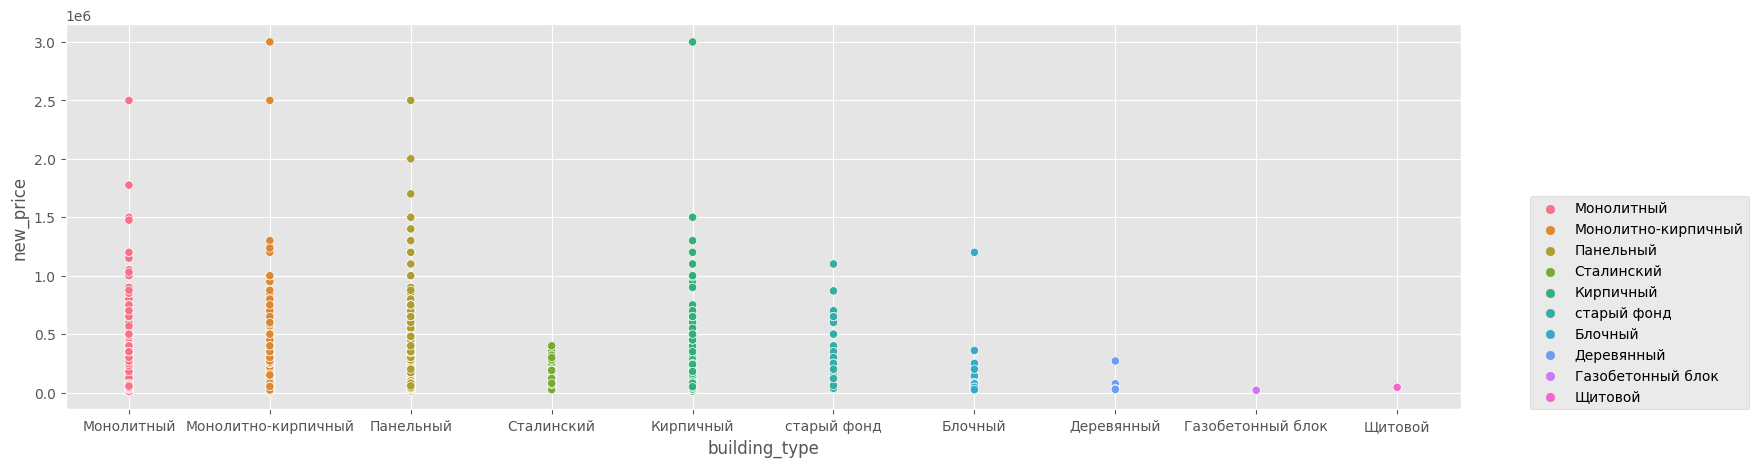

In [448]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,5))
sns.scatterplot(x = cian['building_type'], y = cian['new_price'], hue=cian['building_type'])
plt.legend(loc=[1.05,0])
plt.show()

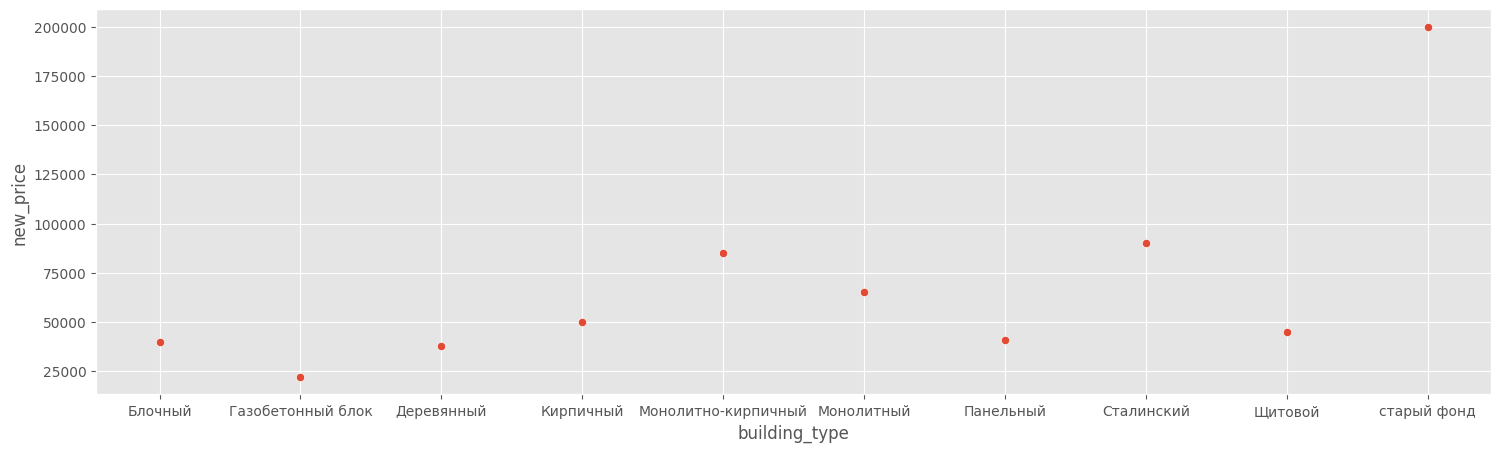

In [449]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18,5))
sns.scatterplot(data = mean_build)
plt.show()

In [450]:
# cian['building_type']= pd.get_dummies(cian['building_type'])

In [451]:
# # закодируем категориальные признаки типа здания с помощью нашей ранжироки
cian = cian.replace({'building_type': {'Панельный': 41000, 'Монолитный': 65000, 'Кирпичный': 50000, 'Блочный': 40000, 'Монолитно-кирпичный': 85000, 
'Сталинский': 90000, 'старый фонд': 200000, 'Деревянный': 37499, 'Газобетонный блок': 1,'Щитовой': 45000}})

In [452]:
#переименуем колонки
# cian = cian.rename(columns = {'building_type_Блочный': 'block', 'building_type_Газобетонный блок': 'concrete','building_type_Деревянный':'wood','building_type_Кирпичный':'brick',
# 'building_type_Монолитно-кирпичный':'monobrick','building_type_Монолитный':'mono', 'building_type_Панельный':'panel', 'building_type_Сталинский':'stalin',
# 'building_type_Щитовой':'sheild','building_type_старый фонд':'old'})
# cian['building_type'].isna().sum()

In [453]:
cian #building parking address price kids_pets_allowed ceiling_m 
cian[['parking']].value_counts()


parking       
наземная          6043
подземная         2772
открытая          1017
многоуровневая     118
на крыше             1
dtype: int64

In [454]:
# пропущенных значений больше половины, а из известных,
# наземный тип самый распространенный, поэтому заполняем так
cian[['parking','new_price']]
cian[['parking']].isnull().sum()
cian['parking'] = cian['parking'].fillna('наземная')

In [455]:
# cian[['parking']].value_counts().sum()

In [456]:
# посмотрим на колонку с детьми и животными

In [457]:
cian['kids_pets_allowed']

0        Можно с детьми, Можно с животными
1                           Можно с детьми
2                           Можно с детьми
3                        Можно с животными
4                                      NaN
                       ...                
23363                                  NaN
23364                                  NaN
23365                       Можно с детьми
23366                                  NaN
23367    Можно с детьми, Можно с животными
Name: kids_pets_allowed, Length: 23368, dtype: object

In [458]:
cian['kids_pets_allowed'] = cian['kids_pets_allowed'].fillna('0')

In [459]:
median_kids = cian.groupby('kids_pets_allowed')['new_price'].median()
median_kids

kids_pets_allowed
0                                    45000.0
Можно с детьми                       50000.0
Можно с детьми, Можно с животными    50000.0
Можно с животными                    45000.0
Name: new_price, dtype: float64

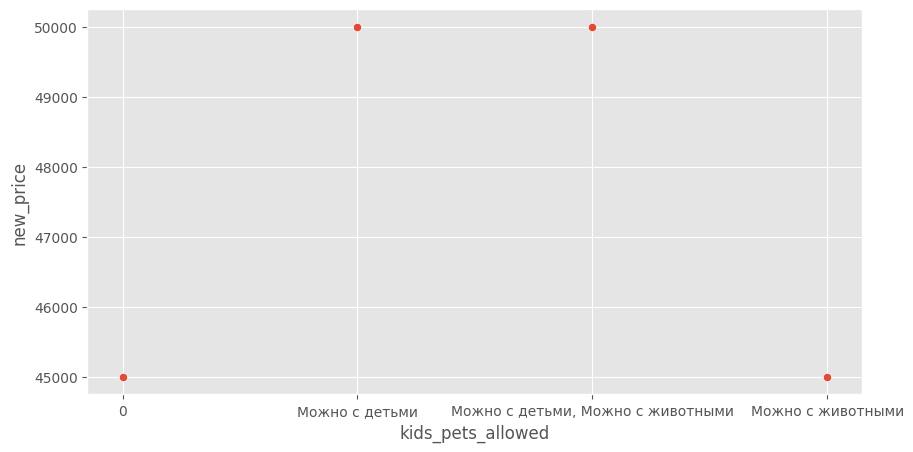

In [460]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = median_kids)
plt.show()

In [461]:
# cian['kids_pets_allowed'].to_list()

In [462]:
cian = cian.replace({'kids_pets_allowed': {'Можно с детьми': 1, 'Можно с детьми, Можно с животными': 1, 'Можно с животными': 0, '0': 0}})
            

In [463]:

cian['kids_pets_allowed'].isna().sum()

0

<class 'pandas.core.series.Series'>
RangeIndex: 23368 entries, 0 to 23367
Series name: kids_pets_allowed
Non-Null Count  Dtype
--------------  -----
23368 non-null  int64
dtypes: int64(1)
memory usage: 182.7 KB


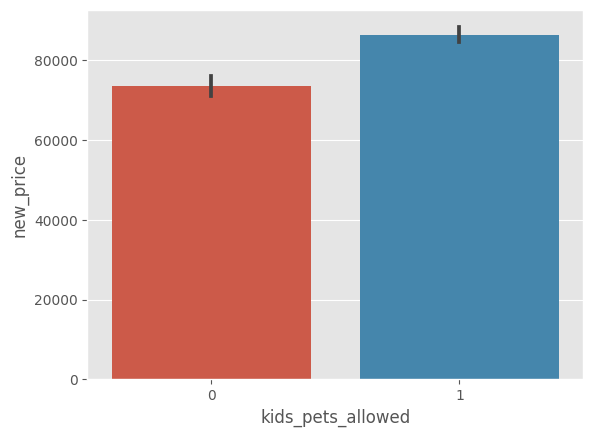

In [464]:
cian['kids_pets_allowed'].info()

sns.barplot(x = 'kids_pets_allowed', y = 'new_price',data=cian);

In [465]:
cian # parking address   ceiling_m 
# посмотрим на парковкку(неизвестных данных нет)
cian['parking'].value_counts()


наземная          19460
подземная          2772
открытая           1017
многоуровневая      118
на крыше              1
Name: parking, dtype: int64

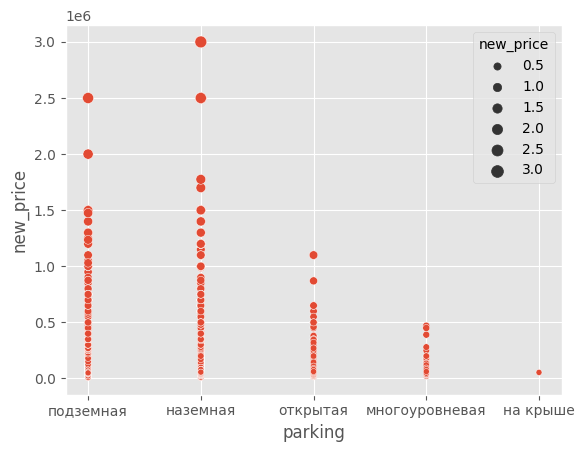

In [466]:
ax = sns.scatterplot(x = 'parking', y = 'new_price',data=cian, size='new_price')

In [467]:
cian[cian['parking']=='на крыше']

,rooms,subway,address,area_m2,building,parking,price,renovation,rooms_area_m2,balcony,...,additional,resid_site_name,ceiling_m,lift,garbage_trunk,building_type,floor,total_floors,new_price,loan
13609,1,м. Проспект Вернадского (5 мин пешком),"Москва, проспект Вернадского, 41С1",30.0/10.0/3.0,"10/10, Монолитный",на крыше,"54000.0 руб./ За месяц, Залог - 54000 руб., Ко...",Дизайнерский,10,NaN,...,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,"Пасс (2), Груз (2)",0,65000,10,10,54000,54000


In [468]:
#заменим значение "на крыше" на "подземная"
cian.loc[13609,'parking'] = 'подземная'

In [469]:
# заполняем nan по самому частому признаку
cian['parking'] = cian['parking'].fillna('0')

In [470]:
median_park = cian.groupby('parking')['new_price'].median()
median_park

parking
многоуровневая     70000.0
наземная           45000.0
открытая           50000.0
подземная         100000.0
Name: new_price, dtype: float64

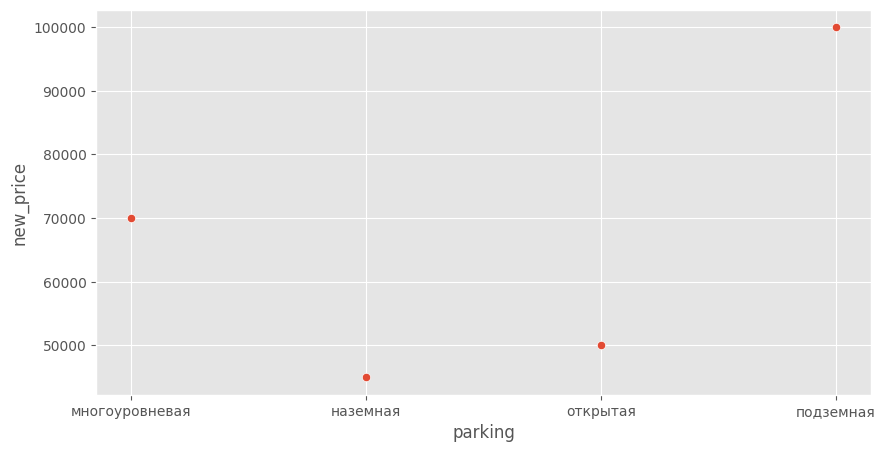

In [471]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data = median_park)
plt.show()

In [472]:

# cian['parking'] = cian['parking'].replace(['открытая'], 'наземная') 

In [473]:
# ax = sns.scatterplot(x = 'parking', y = 'new_price',data=cian, size='new_price')

In [474]:
# функция добавляет некоторую ранговую систему - чем больше цифра, тем лучше

cian = cian.replace({'parking': {'наземная': 45000, 'подземная': 100000, 'открытая':50000 ,'многоуровневая': 70000, '0': 0}})

In [475]:
#пропущенные значения заполняем медианой, так как предполагаем там среднее значение

cian['ceiling_m'] = cian['ceiling_m'].fillna(cian['ceiling_m'].median())

In [476]:
# cian.info()

In [477]:
#вытащим город
def get_city(name: str):
    return name.split(',')[0].strip()

In [478]:
cian['city']=cian['address'].map(lambda x: get_city(x))

In [479]:
cian['city'].value_counts()

Москва                19737
Санкт-Петербург        3028
Краснодарский край      603
Name: city, dtype: int64

In [480]:

cian = cian.replace({'city': {'Москва': 1, 'Санкт-Петербург': 2, 'Краснодарский край': 0}})

In [481]:
cian = cian[cian['city'] == 1]

In [482]:
cian.drop('city', axis=1, inplace=True)

In [483]:
cian['new_rooms'] = [int(i[0]) for i in [str(i) for i in cian['rooms'].fillna(1)]] 

# cian
#TODOCначала мы заменяем все отсутвующие значения на 1-цу потом преобразуем каждый 0-ой индекс в int

In [484]:
# работаем с renovation
cian['renovation'] = cian['renovation'].fillna('Косметический')

In [485]:
ren = cian.replace({'renovation': {'Дизайнерский': 3, 'Евроремонт': 2, 'Косметический': 1, 'Без ремонта': 0}})
# ren

In [486]:
cian['new_renovation']  = ren['renovation']
cian

,rooms,subway,address,area_m2,building,parking,price,renovation,rooms_area_m2,balcony,...,ceiling_m,lift,garbage_trunk,building_type,floor,total_floors,new_price,loan,new_rooms,new_renovation
0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",100000,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,...,3.00,"Пасс (4), Груз (1)",1,65000,5,16,500000,500000,4,3
1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",100000,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,NaN,...,3.50,"Пасс (1), Груз (1)",0,85000,5,16,500000,500000,4,3
2,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,100000,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,NaN,...,3.20,Пасс (1),0,41000,5,16,500000,500000,4,2
3,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,100000,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,14-42-20-19,NaN,...,3.20,Пасс (1),0,41000,5,6,400000,400000,4,2
4,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",45000,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,20 18,NaN,...,3.90,"Пасс (1), Груз (1)",1,41000,12,26,225000,225000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,45000,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",Евроремонт,NaN,Балкон (1),...,2.64,"Пасс (1), Груз (1)",0,41000,10,14,42000,42000,1,2
23364,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",45000,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",Евроремонт,NaN,Лоджия (1),...,2.64,"Пасс (1), Груз (1)",0,65000,5,18,45000,45000,1,2
23365,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",45000,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Дизайнерский,NaN,Балкон (1),...,2.64,NaN,0,50000,5,5,50000,50000,2,3
23366,2,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",45000,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Евроремонт,NaN,Лоджия (1),...,2.65,Пасс (3),1,65000,8,23,55000,50000,2,2


In [487]:
# работаем с balcony
cian['balcony'] = cian['balcony'].fillna(1)

In [488]:
lenbalcon = cian.replace({'balcony': {'Балкон (1)': 1, 'Балкон (3)': 3, 'Лоджия (1)': 1,
       'Балкон (2), Лоджия (3)': 5, 'Балкон (1), Лоджия (1)': 2, 'Балкон (2)': 2,
       'Лоджия (2)': 2, 'Балкон (3), Лоджия (3)': 6, 'Балкон (3), Лоджия (1)': 4,
       'Лоджия (3)': 3, 'Балкон (1), Лоджия (2)': 3, 'Балкон (2), Лоджия (1)': 3,
       'Балкон (2), Лоджия (2)': 4, 'Балкон (1), Лоджия (3)': 4, 'Балкон (4)': 4,
       'Лоджия (4)': 4, 'Балкон (4), Лоджия (4)': 8, 'Балкон (1), Лоджия (4)': 5}})

In [489]:
cian['new_balcony'] = lenbalcon['balcony']

In [490]:
# работаем с windows
cian['windows'] = cian['windows'].fillna(1)

In [491]:
lenwidnows = cian.replace({'windows': {'На улицу и двор': 3, 'Во двор': 2, 'На улицу': 1}})

In [492]:
cian['new_windows'] = lenwidnows['windows']

In [493]:
#работаем со значениями bathroom
cian['bathroom'] = cian['bathroom'].fillna(1)

In [494]:
lenbathrooms = cian.replace({'bathroom': {'Совмещенный (2), Раздельный (1)': 2, 'Совмещенный (3)': 2,
       'Совмещенный (2)': 1, 'Совмещенный (1), Раздельный (1)': 2,
       'Совмещенный (1)': 1, 'Совмещенный (2), Раздельный (2)': 3,
       'Раздельный (2)': 2, 'Раздельный (1)': 1, 'Раздельный (3)': 3,
       'Совмещенный (4)': 2, 'Совмещенный (3), Раздельный (1)': 3,
       'Раздельный (4)': 4, 'Совмещенный (1), Раздельный (2)': 3,
       'Совмещенный (2), Раздельный (4)': 5,
       'Совмещенный (1), Раздельный (3)': 4,
       'Совмещенный (3), Раздельный (3)': 5,
       'Совмещенный (4), Раздельный (2)': 4,
       'Совмещенный (2), Раздельный (3)': 4,
       'Совмещенный (4), Раздельный (1)': 3,
       'Совмещенный (3), Раздельный (2)': 4}})

In [495]:
cian['new_bathrooms'] = lenbathrooms['bathroom']

In [496]:
#работаем со значениями lift
cian['lift'] = cian['lift'].fillna(1)

In [497]:
lenlift = cian.replace({'lift': {'Пасс (4), Груз (1)': 3, 'Пасс (1), Груз (1)': 2, 'Пасс (1)': 1,
       'Пасс (3)': 2, 'Пасс (4)': 2, 'Пасс (2), Груз (1)': 2, 'Пасс (2)': 1,
       'Пасс (2), Груз (2)': 3, 'Пасс (3), Груз (3)': 5, 'Груз (4)': 2,
       'Пасс (3), Груз (1)': 3, 'Груз (1)': 1, 'Пасс (1), Груз (2)': 3, 'Груз (2)': 2,
       'Пасс (3), Груз (2)': 4, 'Пасс (4), Груз (4)': 6, 'Пасс (2), Груз (3)': 4,
       'Пасс (4), Груз (2)': 4, 'Груз (3)': 3, 'Пасс (1), Груз (3)': 4,
       'Пасс (4), Груз (3)': 5, 'Пасс (5), Груз (1)': 4, 'Пасс (1), Груз (12)': 13,
       'Пасс (60)': 30, 'Пасс (6)': 3, 'Пасс (8), Груз (8)': 12, 'Пасс (7)': 4,
       'Пасс (1), Груз (4)': 5, 'Пасс (50)': 25, 'Пасс (5), Груз (3)': 6,
       'Пасс (2), Груз (4)': 5, 'Груз (6)': 6, 'Груз (8)': 8, 'Пасс (5)': 3}})

In [498]:
cian['new_lift'] = lenlift['lift']

In [499]:
cian.drop(['windows', 'balcony', 'rooms', 'renovation', 'bathroom', 'lift'], axis=1, inplace=True)

In [500]:
cian.drop(['building', 'price', 'address'], axis=1, inplace=True)

In [501]:
# Пишем функции, определяющие станцию метро, приведенное время ходьбы до него пешком (езда на авто тоже приводится 
# к пешеходному времени), а также в качестве "рейтинга" приводится средняя стоимость вокруг характерного радиуса метро за 2019 г.
def sub_station(strc):
    try:
        m=strc.rfind('(')      
        return(strc[3:m-1])
    except:
        return('Not Found')

def station_rate(strd):
    dict_sub={
    "Площадь Революции":	467485	,
    "Охотный ряд":	467485	,
    "Театральная":	467485	,
    "Кропоткинская":	465229	,
    "Арбатска":	452814	,
    "Александровский сад":	452814	,
    "Библиотека Ленина":	452814	,
    "Боровицкая":	452814	,
    "Арбатская":	448036	,
    "Пушкинская":	439731	,
    "Чеховская":	439731	,
    "Тверская":	439731	,
    "Маяковская":	432257	,
    "Кузнецкий мост":	419876	,
    "Лубянка":	419876	,
    "Смоленская":412724,
    "Парк Культуры":	409369	,
    "Китай-город":	398442	,
    "Новокузнецкая":	387244	,
    "Третьяковская":	387244	,
    "Полянка":	376321	,
    "Белорусская":	358614	,
    "Трубная":	352792	,
    "Сретенский бульвар":	348674	,
    "Чистые пруды":	348674	,
    "Тургеневская":	348674	,
    "Сухаревская":	332565	,
    "Фрунзенская":	331864	,
    "Цветной бульвар":	324577	,
    "Ломоносовский проспект":	320859	,
    "Октябрьская":	319866	,
    "Киевская":	318774	,
    "Баррикадная":	317682	,
    "Краснопресненская":	317682	,
    "Раменки":	314779	,
    "Красные ворота":	312795	,
    "Серпуховская":	312552	,
    "Добрынинская":	312552	,
    "Чкаловская":	310722	,
    "Курская":	310722	,
    "Таганская":	307761	,
    "Марксистская":	307761	,
    "Павелецкая":	306558	,
    "Улица 1905 года":	298624	,
    "Менделеевская":	291514	,
    "Новослободская":	298514	,
    "Спортивная":	287231	,
    "Университет":	285388	,
    "Проспект Мира":	290625	,
    "Комсомольская":	278092	,
    "Беговая":	272608	,
    "Красносельская":	265728	,
    "Кутузовская":	262332	,
    "Студенческая":	261818	,
    "Парк Победы":	259817	,
    "Воробьевы горы":	255482	,
    "Минская":	251386	,
    "Динамо":	249064	,
    "Ленинский проспект":	239037	,
    "Достоевская":	238144	,
    "Рижская":	237527	,
    "Шаболовская":	237084	,
    "Выставочная":	236874	,
    "Деловой центр":	236874	,
    "Международная":	236584	,
    "Проспект Вернадского":	232684	,
    "Сокольники":	231764	,
    "Бауманская":	230786	,
    "Крестьянская застава":	228416	,
    "Пролетарская":	228416	,
    "Савеловская":	227532	,
    "Алексеевская":	224883	,
    "Римская":	224681	,
    "Площадь Ильича":	224681	,
    "Аэропорт":	224107	,
    "Сокол":	222714	,
    "Академическая":	222659	,
    "Фили":	222361	,
    "Марьина роща":	221487	,
    "Багратионовская":	221079	,
    "Полежаевская":	220551	,
    "Профсоюзная":	218806	,
    "Октябрьское Поле":	218571	,
    "ВДНХ":	218109	,
    "Тульская":	217633	,
    "Щукинская":	216935	,
    "Новые Черёмушки":	216423	,
    "Кунцевская":	214827	,
    "Славянский бульвар":	214183	,
    "Филевский парк":	210662	,
    "Крылатское":	209729	,
    "Пионерская":	209298	,
    "Дмитровская":	207314	,
    "Калужская":	205748	,
    "Автозаводская":	204343	,
    "Тимирязевская":	203114	,
    "Юго-Западная":	202736	,
    "Молодежная":	201585	,
    "Технопарк":	200337	,
    "Авиамоторная":	199226	,
    "Тропарёво":	198745	,
    "Электрозаводская":	197379	,
    "Строгино":	197264	,
    "Войковская":	196784	,
    "Волгоградский проспект":	194662	,
    "Коломенская":	193614	,
    "Водный стадион":	192672	,
    "Ботанический сад":	192629	,
    "Семеновская":	191904	,
    "Петровско-Разумовская":	191728	,
    "Свиблово":	191311	,
    "Спартак":	191293	,
    "Тушинская":	191293	,
    "Дубровка":	189304	,
    "Речной вокзал":	189022	,
    "Партизанская":	187630	,
    "Сходненская":	187223	,
    "Измайловская":	186682	,
    "Беляево":	185416	,
    "Планерная":	184836	,
    "Нагатинская":	184711	,
    "Нахимовский Проспект":	183227	,
    "Севастопольская":	182378	,
    "Каховская":	182378	,
    "Коньково":	181338	,
    "Чертановская":	181286	,
    "Шоссе Энтузиастов":	180920	,
    "Бульвар Рокоссовского":	180772	,
    "Варшавская":	180658	,
    "Первомайская":	179734	,
    "Южная":	177786	,
    "Каширская":	177324	,
    "Нагорная":	174506	,
    "Бабушкинская":	172552	,
    "Владыкино":	172116	,
    "Теплый стан":	172004	,
    "Ясенево":	170212	,
    "Битцевский парк":	165882	,
    "Новоясеневская":	165882	,
    "Медведково":	163873	,
    "Кожуховская":	163228	,
    "Преображенская площадь":	162348	,
    "Волоколамская":	162282	,
    "Митино":	161915	,
    "Кантемировская":	161827	,
    "Щелковская":	161338	,
    "Пражская":	160817	,
    "Пятницкое шоссе":	160774	,
    "Отрадное":	160767	,
    "Кузьминки":	160478	,
    "Текстильщики":	159326	,
    "Перово":	158608	,
    "Царицыно":	157902	,
    "Новогиреево":	157442	,
    "Черкизовская":	154821	,
    "Улица Академика Янгеля":	152921	,
    "Бибирево":	152794	,
    "Аннино":	152744	,
    "Рязанский проспект":	151882	,
    "Орехово":	151817	,
    "Лесопарковая":	151674	,
    "Волжская":	151343	,
    "Бульвар Дмитрия Донского":	150244	,
    "Улица Старокачаловская":	150244	,
    "Печатники":	150028	,
    "Домодедовская":	148232	,
    "Братиславская":	148131	,
    "Люблино":	147992	,
    "Марьино":	147238	,
    "Выхино":	145317	,
    "Шипиловская":	145019	,
    "Борисово":	144556	,
    "Алтуфьево":	144526	,
    "Алма-Атинская":	144223	,
    "Красногвардейская":	143827	,
    "Зябликово":	143827	,
    "Жулебино":	143378	,
    "Лермонтовский проспект":	142874	,
    "Новокосино":	140736	,
    "Мякинино":	138729	,
    "Улица Скобелевская":	137319	,
    "Улица Горчакова":	137128	,
    "Бульвар адмирала Ушакова":	136967	,
    "Бунинская аллея":	136674	,
    "Румянцево":	128693	,
    "Саларьево":	125653	,
    "Котельники":	115489
    }
    try:
        n=dict_sub[strd]
    except:
        n=115489
    return(n)

def sub_wal_dis(strg):
    stre=str(strg)
    if stre.count('машине') != 0:
        n = stre.split('(')
        
        try:
            m = n[1].split(' ')
            q=float(m[0])
            return(q*6.72)
        except:
            return(120.0)
    else:
        n = stre.split('(')
        
        try:
            m = n[1].split(' ')
            q=float(m[0])
            return(q)
        except:
            return(120.0)
        

In [502]:
cian['sub_station'] = cian['subway'].map(sub_station)

In [503]:
cian['st_rating'] = cian['sub_station'].map(station_rate)

In [504]:
cian['st_rating'].unique()

array([412724, 448036, 465229, 452814, 318774, 115489, 317682, 144526,
       238144, 419876, 332565, 290625, 324577, 352792, 278092, 237527,
       348674, 221487, 193614, 163228, 200337, 150028, 239037, 204343,
       160817, 144223, 152921, 143827, 157902, 217633, 145019, 161827,
       151817, 189304, 181286, 182378, 306558, 174506, 177324, 148232,
       151674, 237084, 152744, 180658, 184711, 228416, 177786, 161915,
       162282, 160774, 147992, 148131, 151343, 147238, 184836, 189022,
       187223, 160478, 151882, 159326, 196784, 191728, 222714, 192672,
       144556, 160767, 172116, 152794, 197264, 138729, 216935, 191293,
       192629, 218109, 312552, 387244, 307761, 251386, 214183, 314779,
       232684, 161338, 179734, 154821, 186682, 172552, 191311, 163873,
       221079, 259817, 320859, 202736, 205748, 214827, 262332, 201585,
       236874, 285388, 209729, 261818, 222361, 210662, 191904, 197379,
       180920, 187630, 220551, 224107, 467485, 236584, 358614, 432257,
      

In [505]:
cian['st_walk'] = cian['subway'].map(sub_wal_dis)

In [506]:
# возвращает список общей и жилых площадей, а также площадь кухни
# если указана одна площадь, то из интерполяционных значений подбираются жилая площадь(k=0.58) и площадь кухни(k=0.12) (усерднял по 40 имеющимся значениями), однако есть лимиты на площадь кухни от 5.5 до 20 м2
# area_1 - calculation overall area
def area_1(stra):
    l=[]
    if stra.count('/') ==2:
        s=stra.split('/')
        l.append(float(s[0]))
        l.append(float(s[1]))
        l.append(float(s[2]))
        return(l[0])
    elif stra.count('+') != 0:
        s=stra.split('+')
        try:
            l.append(float(s[0])+float(s[1]))
        except:
            l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[0])
    elif stra.count('/') == 1:
        s=stra.split('/')
        l.append(float(s[0]))
        if float(s[1]) > l[0]*0.25 :
            l.append(float(s[1]))
            l.append(0.12*l[0])
            if l[2]>20.0:
                l[2]=20
            elif l[2]<5.5:
                l[2]=5.5
            return(l[0])
        else:
            l.append(0.58*l[0])
            l.append(float(s[1]))
            
            return(l[0])

    elif stra.count('/') == 0:
        s=stra.split(' ')
        l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[0])
# area_2 - calculation living area
def area_2(stra):
    l=[]
    if stra.count('/') ==2:
        s=stra.split('/')
        l.append(float(s[0]))
        l.append(float(s[1]))
        l.append(float(s[2]))
        return(l[1])
    elif stra.count('+') != 0:
        s=stra.split('+')
        try:
            l.append(float(s[0])+float(s[1]))
        except:
            l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[1])
    elif stra.count('/') == 1:
        s=stra.split('/')
        l.append(float(s[0]))
        if float(s[1]) > l[0]*0.25 :
            l.append(float(s[1]))
            l.append(0.12*l[0])
            if l[2]>20.0:
                l[2]=20
            elif l[2]<5.5:
                l[2]=5.5
            return(l[1])
        else:
            l.append(0.58*l[0])
            l.append(float(s[1]))
            
            return(l[1])

    elif stra.count('/') == 0:
        s=stra.split(' ')
        l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[1])
# area_3 - calculation kitchen area
def area_3(stra):
    l=[]
    if stra.count('/') ==2:
        s=stra.split('/')
        l.append(float(s[0]))
        l.append(float(s[1]))
        l.append(float(s[2]))
        return(l[2])
    elif stra.count('+') != 0:
        s=stra.split('+')
        try:
            l.append(float(s[0])+float(s[1]))
        except:
            l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[2])
    elif stra.count('/') == 1:
        s=stra.split('/')
        l.append(float(s[0]))
        if float(s[1]) > l[0]*0.25 :
            l.append(float(s[1]))
            l.append(0.12*l[0])
            if l[2]>20.0:
                l[2]=20
            elif l[2]<5.5:
                l[2]=5.5
            return(l[2])
        else:
            l.append(0.58*l[0])
            l.append(float(s[1]))
            
            return(l[2])

    elif stra.count('/') == 0:
        s=stra.split(' ')
        l.append(float(s[0]))
        l.append(0.58*l[0])
        l.append(0.12*l[0])
        if l[2]>20.0:
            l[2]=20
        elif l[2]<5.5:
            l[2]=5.5
        return(l[2])

In [507]:
cian['area_total'] = cian['area_m2'].map(area_1)

In [508]:
cian['area_liv'] = cian['area_m2'].map(area_2)

In [509]:
cian['area_kit'] = cian['area_m2'].map(area_3)

In [510]:
# возвращает кол-во перечисленных удобств
def add_1(strb):
    stra = str(strb)
    if stra == 'Non' or stra == 'None':
        return(0)
    else :
        return(stra.count(',')+1)
add_1('None')

0

In [511]:
cian['utilities'] = cian['additional'].map(add_1)

In [512]:
def bel_eliteapp(ap_name):
    try:
        l = len(ap_name)
        if l > 1:
            return(1)
        else:
            return(0)
    except:
        return(0)

In [513]:
cian['ellit_appart']=cian['resid_site_name'].map(bel_eliteapp)

In [514]:
cian['ellit_appart'].unique()

array([1, 0])

In [515]:
cian.drop(['subway', 'area_m2', 'additional', 'resid_site_name','rooms_area_m2', 'sub_station'], axis=1, inplace=True)

In [516]:
cian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19737 entries, 0 to 23367
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   parking            19737 non-null  int64  
 1   kids_pets_allowed  19737 non-null  int64  
 2   ceiling_m          19737 non-null  float64
 3   garbage_trunk      19737 non-null  int64  
 4   building_type      19737 non-null  int64  
 5   floor              19737 non-null  int64  
 6   total_floors       19737 non-null  int64  
 7   new_price          19737 non-null  int64  
 8   loan               19737 non-null  int64  
 9   new_rooms          19737 non-null  int64  
 10  new_renovation     19737 non-null  int64  
 11  new_balcony        19737 non-null  int64  
 12  new_windows        19737 non-null  int64  
 13  new_bathrooms      19737 non-null  int64  
 14  new_lift           19737 non-null  int64  
 15  st_rating          19737 non-null  int64  
 16  st_walk            197

In [517]:
cian['cost']=cian['st_rating']*cian['area_total']

In [518]:
cian.drop(['loan'], axis=1, inplace=True)

In [519]:
# cian.drop(['new_renovation'], axis=1, inplace=True)

In [520]:
# cian.drop(['parking'], axis=1, inplace=True)

In [521]:
# cian.to_csv('/home/milla/myprojects/cian_project/cian_prep.csv')
cian.reset_index()

,index,parking,kids_pets_allowed,ceiling_m,garbage_trunk,building_type,floor,total_floors,new_price,new_rooms,...,new_bathrooms,new_lift,st_rating,st_walk,area_total,area_liv,area_kit,utilities,ellit_appart,cost
0,0,100000,1,3.00,1,65000,5,16,500000,4,...,1,3,412724,9.0,200.0,116.000,20.0,11,1,82544800.0
1,1,100000,1,3.50,0,85000,5,16,500000,4,...,2,2,412724,8.0,198.0,95.000,18.0,10,1,81719352.0
2,2,100000,1,3.20,0,41000,5,16,500000,4,...,2,1,412724,7.0,200.0,116.000,4.0,11,1,82544800.0
3,3,100000,0,3.20,0,41000,5,6,400000,4,...,2,1,412724,3.0,170.0,95.000,17.0,11,0,70163080.0
4,4,45000,0,3.90,1,41000,12,26,225000,2,...,1,2,448036,7.0,58.0,38.000,5.0,9,1,25986088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,23363,45000,0,2.64,0,41000,10,14,42000,1,...,1,2,115489,8.0,35.0,16.400,8.0,7,1,4042115.0
19733,23364,45000,0,2.64,0,65000,5,18,45000,1,...,1,2,115489,7.0,38.7,16.500,11.0,6,1,4469424.3
19734,23365,45000,1,2.64,0,50000,5,5,50000,2,...,1,1,115489,6.0,43.1,24.998,5.5,6,0,4977575.9
19735,23366,45000,0,2.65,1,65000,8,23,55000,2,...,2,2,115489,11.0,52.5,30.450,10.0,7,0,6063172.5


In [522]:
cian.to_csv('/home/milla/myprojects/cian_project/cian_final.csv')

In [523]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [524]:
from sklearn.model_selection import train_test_split

In [525]:
from sklearn.metrics import mean_squared_error, r2_score

In [526]:
X, y = cian.loc[:, cian.columns != 'new_price'], cian['new_price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,random_state = 2, test_size=0.25)

In [527]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 19737 entries, 0 to 23367
Series name: new_price
Non-Null Count  Dtype
--------------  -----
19737 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


In [528]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((14802, 21), (4935, 21), (14802,), (4935,))

In [529]:
regr = linear_model.LinearRegression()

In [530]:
# обучаем модель на тренировочной выборке
regr.fit(X_train, y_train)

LinearRegression()

In [531]:
# делаем предсказания на тестовой выботке
y_pred = regr.predict(X_valid)
y_pred

array([ 62953.53939423,  61749.55091967,  35267.49026046, ...,
        51044.20651706,  55888.67468859, 105358.85145521])

In [532]:
regr.score(X_valid, y_valid) 

0.7056241531215777

In [533]:
predict = pd.DataFrame(y_pred,y_valid)

In [534]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_valid, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_valid, y_pred))

Coefficients: 
 [ 1.44477120e-01 -2.58668623e+03 -5.85621735e+01 -7.13345664e+03
 -2.55948475e-01 -9.43581467e+01  1.59318640e+02 -3.31723222e+03
  9.92866054e+03 -1.23424486e+03 -4.39697998e+03  2.73727333e+04
 -2.75506399e+03 -2.64682265e-01  2.68397973e+01 -5.67802398e+02
  7.62447745e+02  3.24355353e+02  1.45476178e+03  3.01309683e+04
  6.94486528e-03]
Mean squared error: 5008164235.83
Coefficient of determination: 0.71


In [535]:
predict.head(30)

,0
new_price,
36000,62953.539394
55000,61749.550920
45000,35267.490260
45000,61958.651692
50000,69348.058490
60000,55503.702284
70000,73763.036819
37000,34754.880019
65000,102402.046974
